# Import files

In [1]:
import gensim
from gensim.models import Word2Vec
from gensim import corpora
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import glob

# Read all files and create training corpus

In [2]:
files = glob.glob('../pre-processing/combined/combined-everything.txt')
list_of_tokens=[]
for file_name in files:
    file = open(file_name,'r')
    txt = file.read()
    list_of_tokens = list_of_tokens + txt.split('\n')
    
corpus = [element.split(" ") for element in list_of_tokens]

In [3]:
training_corpus = []
for line in corpus:
    training_corpus.append([elem for elem in line if elem != ''])

# Train the word2vec model on the corpus

In [4]:
model = Word2Vec(training_corpus, size=50, window=3, min_count=1, workers=8, sg=1)
model.train(training_corpus, total_examples=len(training_corpus), epochs=10)

(6608350, 6659400)

In [5]:
model.save('word2vec_model.model')

# Find mean similarity of  every sentence in test to source

In [14]:
w2v_model = gensim.models.Word2Vec.load('word2vec_model.model')

In [18]:
#open the source file, convert it in the required form
source_file = open('../pre-processing/combined/combined-source.txt','r')
source_lines = source_file.read()
source_tokens = []
source_tokens = source_tokens + source_lines.split('\n')

s_corpus = [element.split(" ") for element in source_tokens]

source_corpus = []
for line in s_corpus:
    if line != ['']: #remove any extra blank words in the list
        source_corpus.append([elem for elem in line if elem != ''])

In [19]:
#open the test file, convert it in the required form
test_file = open('../pre-processing/combined/combined-test-suspected-algo.txt','r')
test_lines = test_file.read()
test_tokens = []
test_tokens = test_tokens + test_lines.split('\n')

t_corpus = [element.split(" ") for element in test_tokens]

test_corpus = []
for line in t_corpus:
    if line != ['']: #remove any extra blank words in the list
        test_corpus.append([elem for elem in line if elem != ''])

In [20]:
#calculate the similarity between every sentence in the source and every sentence in the test
similarity=[]
for test_sentence in test_corpus: #iterate over every sentence in the test corpus
    similarities=[]
    for source_sentence in source_corpus: #for every sentence in the test, iterate over every sentence in the source
        similarities.append(w2v_model.wv.n_similarity(source_sentence,test_sentence))
    #out of all similarities for each sentence in the test to every sentence in the source, get the maximum one
    similarity.append(similarities)

KeyError: "word 'con-' not in vocabulary"

In [58]:
similarity

[0.8865773,
 0.8941946,
 0.9473679,
 0.8986295,
 0.90513,
 0.93783194,
 0.94278836,
 0.9358468,
 0.8717303,
 0.984144,
 0.9585238,
 0.87392455,
 0.9290533,
 0.9466342,
 0.92529035,
 0.94353455,
 0.9285635,
 0.83857393,
 0.8327945,
 0.8762984,
 0.97258127,
 0.9024546,
 0.79354686,
 0.8534088,
 0.93763894,
 0.84330237,
 0.9271139,
 0.9307833,
 0.93197805,
 0.9619253,
 0.9509815,
 0.9526776,
 0.9278922,
 0.94132394,
 0.87652504,
 0.9198842,
 0.9596263,
 0.9343928,
 0.8739773,
 0.9366056,
 0.9119852,
 0.939381,
 0.9495576,
 0.95819056,
 0.9564549,
 0.94598657,
 0.9251766,
 0.93579155,
 0.8992141,
 0.93608826,
 0.94782,
 0.92319465,
 0.9372726,
 0.9166234,
 0.91965824,
 0.9367406,
 0.935888,
 0.9411037,
 0.95633036,
 0.89557344,
 0.9113914,
 0.94033873,
 0.9472614,
 0.9446899,
 0.9197588,
 0.9590668,
 0.9577518,
 0.9628923,
 0.9423261,
 0.95430624,
 0.9324924,
 0.94341105,
 0.93396544,
 0.9384615,
 0.9572496,
 0.952216,
 0.9277074,
 0.94576734,
 0.9537237,
 0.93594915,
 0.9323228,
 0.942915

In [59]:
mean_similarity = sum(max_similarity)/float(len(max_similarity))

In [60]:
mean_similarity

0.9205788670435747

In [67]:
x=[]
for i in range(0,len(max_similarity)):
    x.append(i+1)

In [68]:
y = max_similarity

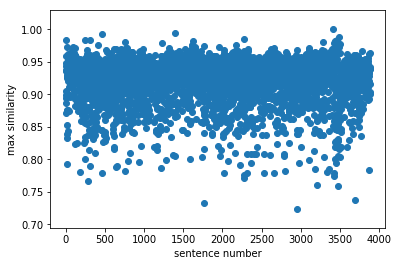

In [69]:
plt.scatter(x, y)
plt.xlabel('sentence number')
plt.ylabel('max similarity')
plt.show()

#### Repeat the same for suspected-no-slgo and source corpus

In [62]:
test_file_no_algo = open('../pre-processing/combined/combined-test-suspected-no-algo.txt','r')
test_lines_no_algo = test_file_no_algo.read()
test_tokens_no_algo = []
test_tokens_no_algo = test_tokens_no_algo + test_lines_no_algo.split('\n')

t_corpus_no_algo = [element.split(" ") for element in test_tokens_no_algo]

test_corpus_no_algo = []
for line in t_corpus_no_algo:
    if line != ['']:
        test_corpus_no_algo.append([elem for elem in line if elem != ''])

In [63]:
similarity_no_algo=[]
for test_sentence in test_corpus_no_algo:
    similarities_no_algo=[]
    for source_sentence in source_corpus:
        similarities_no_algo.append(w2v_model.wv.n_similarity(source_sentence,test_sentence))
    similarity_no_algo.append(similarities_no_algo)

/Users/aashnakanuga/anaconda2/envs/env/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [64]:
similarity_no_algo

[0.92200357,
 0.92664486,
 0.85388476,
 0.9434138,
 0.9485909,
 0.94843507,
 0.96000195,
 0.9434844,
 0.939746,
 0.9484972,
 0.9458726,
 0.94067127,
 0.9115875,
 0.86383647,
 0.9274408,
 0.952334,
 0.93833506,
 0.94133705,
 0.8698559,
 0.9282869,
 0.9284839,
 0.94211006,
 0.9362064,
 0.9295754,
 0.9218972,
 0.88977057,
 0.935178,
 0.9052398,
 0.9502496,
 0.9249437,
 0.9143633,
 0.936578,
 0.8787243,
 0.9429239,
 0.95073885,
 0.86174077,
 0.8728565,
 0.8793306,
 0.90304637,
 0.85116804,
 0.89177686,
 0.7986647,
 0.8482856,
 0.8662553,
 0.9411842,
 0.92048305,
 0.93911827,
 0.8790135,
 0.8659618,
 0.906255,
 0.837695,
 0.8716187,
 0.8363737,
 0.94439065,
 0.9352867,
 0.8367286,
 0.93472743,
 0.84421974,
 0.7471213,
 0.88940406,
 0.958759,
 0.92630595,
 0.88697094,
 0.880472,
 0.8526492,
 0.94481945,
 0.9068853,
 0.90412635,
 0.90813833,
 0.954166,
 0.9597596,
 0.94461924,
 0.9211116,
 0.91754967,
 0.95809054,
 0.95188403,
 0.9302392,
 0.92311716,
 0.93927324,
 0.91099745,
 0.9198716,
 0.

In [65]:
mean_similarity_no_algo = sum(max_similarity_no_algo)/float(len(max_similarity_no_algo))

In [66]:
mean_similarity_no_algo

0.9198878036827897

# Tests on model
## No need to run this chunk -just a few things I was trying

## Find a list of similar words for a given word

In [62]:
w1 = "love"
model.wv.most_similar(positive=w1)

[('affair', 0.7747365236282349),
 ('courtship', 0.7191614508628845),
 ('jealous', 0.7093785405158997),
 ('vow', 0.6994887590408325),
 ('illicit', 0.6967019438743591),
 ('rejection', 0.6899811029434204),
 ('u-', 0.6879823207855225),
 ('parent', 0.684080958366394),
 ('affection', 0.6839406490325928),
 ('imago', 0.6832321882247925)]

## Man is to woman, as king is to?

In [63]:
model.wv.most_similar(positive=['man', 'king'], negative=['woman'], topn=1)

[('philip', 0.6605688333511353)]

## Find a word in a list that does not belong to the same category as the other words

In [74]:
model.wv.doesnt_match("treachery obstacle kinsman hate".split())

'hate'

## Check the accuracy using a common file used to test the model

In [69]:
accuracy=model.wv.accuracy("questions-words.txt")

In [70]:
accuracy_ratio = []
category_names = []
for category in accuracy:
    if len(category['correct'])+len(category['incorrect'])>0:
        correctness = len(category['correct'])/(len(category['correct'])+len(category['incorrect']))
    else:
        correctness = 0.0
    accuracy_ratio.append(correctness)
    category_names.append(category['section'])

In [71]:
for i in range(0,len(category_names)):
    print(category_names[i], accuracy_ratio[i])

capital-common-countries 0.0
capital-world 0.0
currency 0.0
city-in-state 0.004761904761904762
family 0.07142857142857142
gram1-adjective-to-adverb 0.0
gram2-opposite 0.0
gram3-comparative 0.005040322580645161
gram4-superlative 0.007246376811594203
gram5-present-participle 0.007122507122507123
gram6-nationality-adjective 0.0
gram7-past-tense 0.030952380952380953
gram8-plural 0.0
gram9-plural-verbs 0.0
total 0.012625324916450055


## Find cosine distance between two words

In [72]:
dist = model.wv.distance("queen","king")

In [73]:
print(dist)

0.24179071994870938


# Visualize

In [15]:
vocab = list(model.wv.vocab)
X = model[vocab]

/Users/aashnakanuga/anaconda2/envs/env/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [44]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X[:200,:])

In [47]:
df = pd.DataFrame(X_tsne, index=vocab[:200], columns=['x', 'y'])

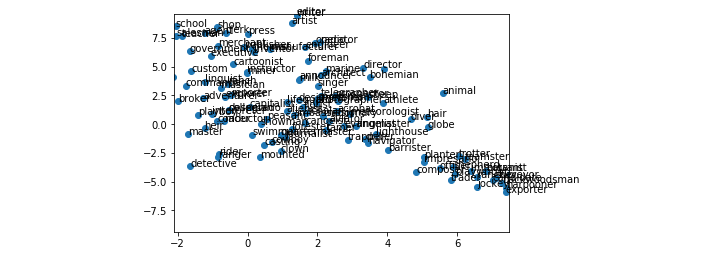

In [49]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])
ax.margins(-0.25,0)
for word, pos in df.iterrows():
    ax.annotate(word, pos)